In [1]:
# Import Numpy & PyTorch
import numpy as np
import torch
# Imports
import torch.nn as nn
# Import nn.functional
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [11]:
class Net(nn.Module):
    # Initialize the layers


    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(d, 512)
        
        def snake(x):
          a = 20
          return  x + ((torch.sin(a* x)) ** 2) /a
        #self.act1 = nn.ReLU() # Activation function
        self.act1 = snake # Activation function

        self.linear2= nn.Linear(512, 1)
    
    # Perform the computation
    def forward(self, x):
        x = self.linear1(x)
        x = self.act1(x) 
        x = self.linear2(x)
        return x

In [17]:
#define function to call in loop of parameter study
def train(X,Y,Xt,Yt, model):#training data X,Y & test data Xt,Yt
#  torch.manual_seed(1)
#  torch.cuda.manual_seed(1)
  torch.cuda.empty_cache()#necessary?
  
  opt = torch.optim.SGD(model.parameters(), 1e-2, momentum=0.9,weight_decay=0)
  loss_fn = F.mse_loss
  Epoch = 15000
  losses = []
  test_losses = []

  zs = []
  epsil = 0
  for i in range(Epoch):
    opt.zero_grad()
    y = model(X)
    #z = (model.linear1.weight.norm(2) ** 2) * epsil
    loss = loss_fn(y, Y) 
    (loss).backward()
    opt.step()
    losses.append(loss)
    if i % 100 ==0:
      print('loss: ' + str(loss.item()))
    #zs.append(z)
    with torch.no_grad():
      y = model(Xt)
      loss = loss_fn(y, Yt)
      test_losses.append(loss)
    #print(loss.item())

  if AdditionalPlots:
    plt.figure(figsize=(8, 5))
    plt.xlim=(10)
    plt.plot(range(1, Epoch+1), losses,label='training loss')
    plt.plot(test_losses, label='testing loss')
    #plt.plot(zs, label='norm of W')
    plt.legend()
    plt.xlabel('time')
    plt.ylabel('loss')
    plt.xscale('log')
#    plt.savefig('wd_1e-3.png', dpi=120, bbox_inches='tight')
    plt.show()
    plt.clf()

In [13]:
#Function for functions
def GetY(i,X,test_X):
  if(i==0):
    f_name = "sin"
    Y = torch.sin(X)
    test_Y = torch.sin(test_X)
  elif(i==1):
    f_name = "x2"
    Y = X*X
    test_Y = test_X*test_X
  elif(i==2):
    f_name = "Gauss"
    Y = torch.exp(-1.0*X*X)
    test_Y = torch.exp(-1.0*test_X*test_X)
  elif(i==3):
    f_name = "Tanh"
    Y = torch.tanh(X)
    test_Y = torch.tanh(test_X)
  elif(i==4):
    f_name = "exp"
    Y = torch.exp(X)
    test_Y = torch.exp(test_X)
    plt.yscale('log')
#TBD: Heavyside Step Function
  else:
    print("Function not yet implemented")
  return f_name, Y, test_Y

Representative Indices: 0 1 1
a1 = 5
Now trying to interpolate sin...


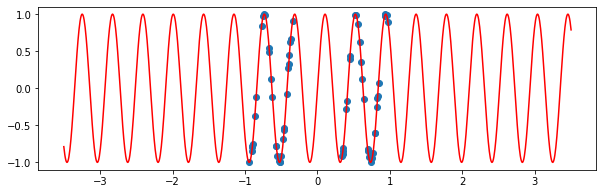

loss:0.5860169529914856
loss:0.15691111981868744
loss:0.035511307418346405
loss:0.0109626529738307
loss:0.004945588298141956
loss:0.0031146639958024025
loss:0.002341823885217309
loss:0.0018878098344430327
loss:0.0015611480921506882
loss:0.0013046886306256056
loss:0.0010992968454957008
loss:0.0009350221371278167
loss:0.0008026424329727888
loss:0.0006940409075468779
loss:0.0006039979634806514
loss:0.0005496517987921834
loss:0.0256204791367054
loss:0.0004577554645948112
loss:0.0003747623704839498
loss:0.0003345172153785825
loss:0.00030023889848962426
loss:0.00027060898719355464
loss:0.00024479394778609276
loss:0.00022218111553229392
loss:0.00020228624634910375
loss:0.0001847389357862994
loss:0.00016921581118367612
loss:0.00015546615759376436
loss:0.00014326605014503002
loss:0.0001324312761425972
loss:0.00012279977090656757
loss:0.00011423195974202827
loss:0.00010671437485143542
loss:0.00010498549090698361
loss:0.0004041189677082002
loss:0.01248210296034813
loss:8.676225115777925e-05
loss:

<Figure size 432x288 with 0 Axes>

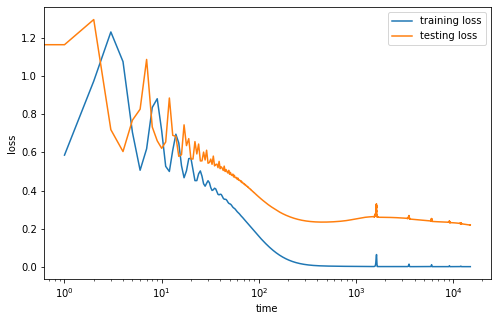

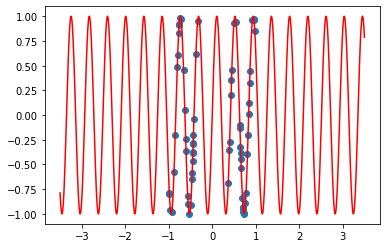

loss:0.6119780540466309
loss:0.1720515489578247
loss:0.05982621759176254
loss:0.02564803883433342
loss:0.012569762766361237
loss:0.0068633598275482655
loss:0.004166735801845789
loss:0.002789729507640004
loss:0.0020237788558006287
loss:0.001552909379824996
loss:0.0012356196530163288
loss:0.0010103050153702497
loss:0.0008464690763503313
loss:0.0007248834590427577
loss:0.0006324374116957188
loss:0.0005603461759164929
loss:0.0005027680308558047
loss:0.0004557833890430629
loss:0.000416741386288777
loss:0.0003837905533146113
loss:0.0003556307638064027
loss:0.0003313267952762544
loss:0.00031019101152196527
loss:0.00029170335619710386
loss:0.00027544988552108407
loss:0.00026108662132173777
loss:0.00024831952759996057
loss:0.00023689010413363576
loss:0.00022657561930827796
loss:0.00021717825438827276
loss:0.00020852989109698683
loss:0.00020048997248522937
loss:0.0001929417921928689
loss:0.0001857871247921139
loss:0.00017895962810143828
loss:0.00017240217130165547
loss:0.00016608499572612345
los

<Figure size 432x288 with 0 Axes>

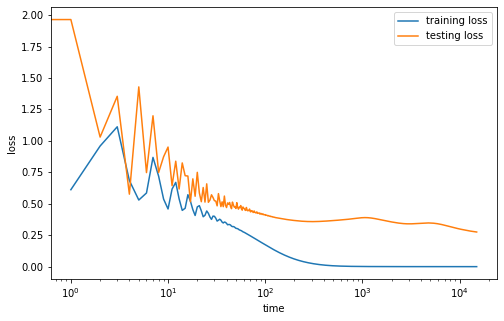

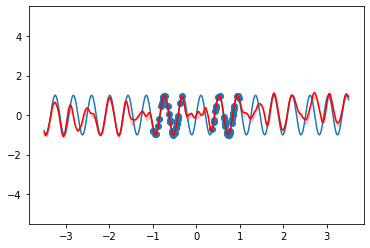

a1 = 5
Now trying to interpolate x2...


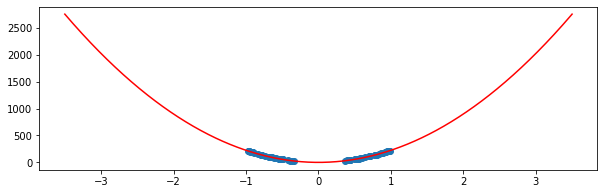

loss:17545.40234375
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan
loss:nan


KeyboardInterrupt: ignored

<Figure size 432x288 with 0 Axes>

In [18]:
### Uniform Random Sampling with Gap of Sampling X-Points ###

torch.manual_seed(1)
torch.cuda.manual_seed(1)
AdditionalPlots = True
ActivationF = "Sin_"#Sigmoid,Tanh,ReLU,Sin
d, N = 1, 32
N_sample = 1000

N_realisations = 2
#to plot scatter
i_median = int(np.floor(N_realisations/2))
if(N_realisations >= 5):
  i_low = 1
  i_high = N_realisations - 2
else:
  i_low = 0
  i_high = N_realisations - 1
print("Representative Indices:",i_low,i_median,i_high)

a1_list = [5]#Gap(more)
a2_list = [10]#Sample

#explore parameters
for i in range(0,5):#analytical functions to model
  count = 0
  plt.figure(figsize=(10, 3))
  for a1 in a1_list:#half the gap around zero
    print("a1 =",a1)
    for a2 in a2_list:#two times this width on both sides of gap to sample from
      count += 1
      plt.subplot(len(a1_list),len(a2_list),count)

      ystack = np.zeros((N_sample,N_realisations))

      for j in range(N_realisations):
        Xp = torch.zeros((N, 1), requires_grad=False).cuda().uniform_(a1,a1+a2)#negative side
        Xn = torch.zeros((N, 1), requires_grad=False).cuda().uniform_(-a2-a1,-a1)#negative side
        X = torch.cat((Xn,Xp), 0)#torch.stack([Xn,Xp])
        
        #TEST
        test_X = torch.linspace(-3.5*(a1+a2),3.5*(a1+a2),steps=N_sample,requires_grad=False).view(N_sample, d).cuda()

        f_name, Y, test_Y = GetY(i,X,test_X)

        #Normalise x values into [-1,1] interval, but keep y values from original range
        X = X / (a1+a2)
        test_X = test_X / (a1+a2)

        if(count==1 and j==0):
          print("Now trying to interpolate "+f_name+"...")

        if AdditionalPlots:
          plt.plot(test_X.cpu(), test_Y.cpu(),color='r')
          plt.scatter(X.cpu(), Y.cpu())
          plt.show()
          plt.clf()

        model = Net().cuda()
        train(X,Y,test_X,test_Y, model)

        y_pred = model(test_X)#model prediction on uniformly sampled data
        ystack[:,j] = y_pred.cpu().detach().numpy().reshape(N_sample)#save for scatter comparison


      ystack = np.sort(ystack)# sort along the last axis
      #
      plt.fill_between(test_X.cpu().detach().numpy().reshape(N_sample), ystack[:,i_low], ystack[:,i_high], color='r', alpha=0.2)

      plt.plot(test_X.cpu().detach().numpy(),test_Y.cpu(),label="ground truth")
      plt.scatter(X.cpu().detach().numpy(),Y.cpu(),label="training set")
      #TBD: scatter
#      plt.plot(test_X.cpu().detach().numpy().reshape(N_sample),ystack[:,i_high],label="predictions high")
      plt.plot(test_X.cpu().detach().numpy().reshape(N_sample),ystack[:,i_median], color='r',label="predictions median")
#      plt.plot(test_X.cpu().detach().numpy().reshape(N_sample),ystack[:,i_low],label="predictions low")
#      plt.plot(test_X.cpu().detach().numpy(),y_pred.cpu().detach().numpy(),label="predictions11")#smoother?
      plt.ylim(-5.5, 5.5)
      #plt.title("Gap: "+str(2*a1)+", Sample:"+str(a2)+", Function: "+f_name)
      #if(count==1):
        #plt.legend()
  plt.savefig("Interpol_Gap_AF_"+ActivationF+f_name+".png", dpi=150, bbox_inches='tight')
  plt.show()